In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import math

In [4]:
df=pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")
df.describe()


,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [5]:
df["Date of Joining"] = pd.to_datetime(df["Date of Joining"])

In [6]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [7]:
df["Resource Allocation"].fillna(df["Resource Allocation"].mean(),inplace = True)
df["Mental Fatigue Score"].fillna(df["Mental Fatigue Score"].mean(),inplace = True)
df["Burn Rate"].fillna(df["Burn Rate"].mean(),inplace = True)

In [8]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [9]:
df = df.drop(['Employee ID'],axis = 1)

In [10]:
print(df["Designation"].skew(), "-> Normally distributed")
print(df["Resource Allocation"].skew(),"-> positively Skewed")
print(df["Mental Fatigue Score"].skew(),"-> negtively skewed")
print(df["Burn Rate"].skew(),"-> Normally distributed")

0.09242138478903683 -> Normally distributed
0.2110787436948646 -> positively Skewed
-0.45245780687704834 -> negtively skewed
0.046910742768045674 -> Normally distributed


In [12]:
columns_list = list(df.columns)
for i in range(len(columns_list)):
    if i == 0 or i == 1:
        continue
    fig = px.histogram(df[columns_list[i]], x=columns_list[i], title="Plot Distribution of " + columns_list[i], color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.5)
    fig.show()

In [13]:
# Box plot for Burn Rate by Designation
fig = px.box(df, x="Designation", y="Burn Rate", title="Burn Rate by Designation", color="Designation",
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    title={
        'text': "Burn Rate by Designation",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Designation",
    yaxis_title="Burn Rate",
    legend_title="Designation",
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="RebeccaPurple"
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [14]:
import plotly.express as px

# Box plot for Burn Rate by Gender
fig = px.box(df, x="Gender", y="Burn Rate", title="Burn Rate by Gender", color="Gender",
             color_discrete_sequence=px.colors.qualitative.Vivid)

# Update layout for better appearance
fig.update_layout(
    title={
        'text': "Burn Rate by Gender",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Gender",
    yaxis_title="Burn Rate",
    legend_title="Gender",
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="RebeccaPurple"
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

# Show the plot
fig.show()

In [15]:
import plotly.express as px

# Box plot for Mental Fatigue Score by Designation
fig = px.box(df, x="Designation", y="Mental Fatigue Score", title="Mental Fatigue Score by Designation", color="Designation",
             color_discrete_sequence=px.colors.qualitative.Vivid)

# Update layout for better appearance
fig.update_layout(
    title={
        'text': "Mental Fatigue Score by Designation",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Designation",
    yaxis_title="Mental Fatigue Score",
    legend_title="Designation",
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="RebeccaPurple"
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

# Show the plot
fig.show()

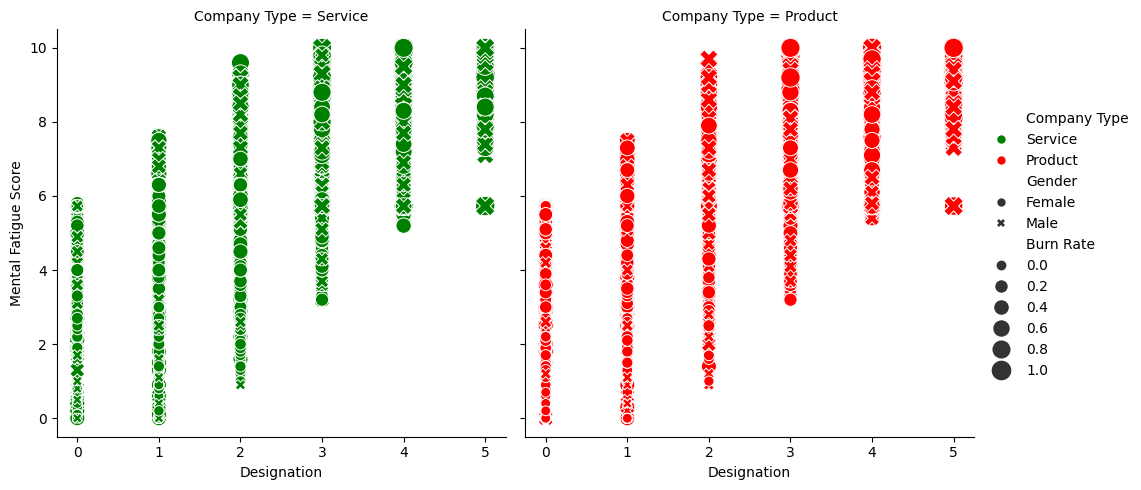

In [16]:
sns.relplot(
    data = df,x="Designation",y="Mental Fatigue Score",
    col ="Company Type", hue ="Company Type",size="Burn Rate",
    style="Gender",palette=["g","r"],sizes=(50,200)

)

In [17]:
label_encode = preprocessing.LabelEncoder()

df['GenderLabel'] = label_encode.fit_transform(df["Gender"].values)
df['WFH Setup AvailableLabel'] = label_encode.fit_transform(df["WFH Setup Available"].values)
df['Company_TypeLabel'] = label_encode.fit_transform(df["Company Type"].values)

In [18]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,WFH Setup AvailableLabel,Company_TypeLabel
0,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,0,0,1
1,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,1,1,1
2,2008-03-10,Female,Product,Yes,2,4.481398,5.8,0.49,0,1,0
3,2008-11-03,Male,Service,Yes,1,1.000000,2.6,0.20,1,1,1
4,2008-07-24,Female,Service,No,3,7.000000,6.9,0.52,0,0,1


In [19]:
X = df.drop(columns=['Burn Rate','Date of Joining',"Gender",'Company Type','WFH Setup Available'])
y = df["Burn Rate"]


In [20]:
X.shape

(22750, 6)

In [21]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [22]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [23]:
print("before",X.shape,"after",X_pca.shape,)
print(pca.explained_variance_ratio_)
print(pca.n_components_)

before (22750, 6) after (22750, 4)
[0.78371089 0.11113597 0.03044541 0.02632422]
4


In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X_pca,y,test_size=0.25,random_state=10)

In [25]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


In [26]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [27]:
train_y_pred = lr_model.predict(X_train)
test_y_pred = lr_model.predict(X_test)

In [28]:
train_r2 = r2_score(Y_train, train_y_pred)
test_r2 = r2_score(Y_test, test_y_pred)

In [29]:
print(f"Training R-squared: {train_r2:.3f}")
print(f"Testing R-squared: {test_r2:.3f}")

Training R-squared: 0.831
Testing R-squared: 0.829


In [30]:
train_mse = mean_squared_error(Y_train, train_y_pred)
test_mse = mean_squared_error(Y_test, test_y_pred)

In [31]:
print(f"Training Mean Squared Error: {train_mse:.3f}")
print(f"Testing Mean Squared Error: {test_mse:.3f}")

Training Mean Squared Error: 0.006
Testing Mean Squared Error: 0.006


In [32]:
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

In [33]:
print(f"Training Root Mean Squared Error: {train_rmse:.3f}")
print(f"Testing Root Mean Squared Error: {test_rmse:.3f}")

Training Root Mean Squared Error: 0.080
Testing Root Mean Squared Error: 0.079


In [34]:
train_mae = mean_absolute_error(Y_train, train_y_pred)
test_mae = mean_absolute_error(Y_test, test_y_pred)

In [35]:
print(f"Training Mean Absolute Error: {train_mae:.3f}")
print(f"Testing Mean Absolute Error: {test_mae:.3f}")

Training Mean Absolute Error: 0.058
Testing Mean Absolute Error: 0.058


In [36]:
train_accuracy = lr_model.score(X_train, Y_train)
test_accuracy = lr_model.score(X_test, Y_test)

In [37]:
train_accuracy

0.8312623650278845

In [38]:
test_accuracy

0.8293668111291459